In [2]:
# import libraries needed
library(tseries)
library(forecast)
library(ggplot2)
library(quantmod)

In [3]:
# Webscrape stock data 
novartis = getSymbols("NVS", auto.assign = F, from = "2015-01-01", to = "2016-01-01")
print(novartis)

           NVS.Open NVS.High  NVS.Low NVS.Close NVS.Volume NVS.Adjusted
2015-01-02 83.18101 83.37814 82.44624  82.66129     807872     57.34184
2015-01-05 83.71864 83.73656 82.59856  82.84050    1537848     57.46617
2015-01-06 82.77778 83.09140 81.52330  82.14158    1316992     56.98132
2015-01-07 81.85484 82.70609 81.76524  82.50000    1598447     57.22996
2015-01-08 84.38172 85.72581 84.22939  85.36739    2156782     59.21904
2015-01-09 86.43369 86.74731 85.77957  86.12903    2206890     59.74739
2015-01-12 86.02151 86.11111 85.29570  85.55556    1412186     59.34959
2015-01-13 86.56810 87.02509 85.72581  86.34409    1928002     59.89659
2015-01-14 86.44265 86.98029 86.21864  86.74731    2447165     60.17629
2015-01-15 88.45878 90.34050 87.30286  90.12545   12332693     62.51971
       ...                                                             
2015-12-17 77.07885 77.67025 76.37993  76.43369    2118280     54.52166
2015-12-18 76.45161 76.89068 75.92294  75.95878    2461784     5

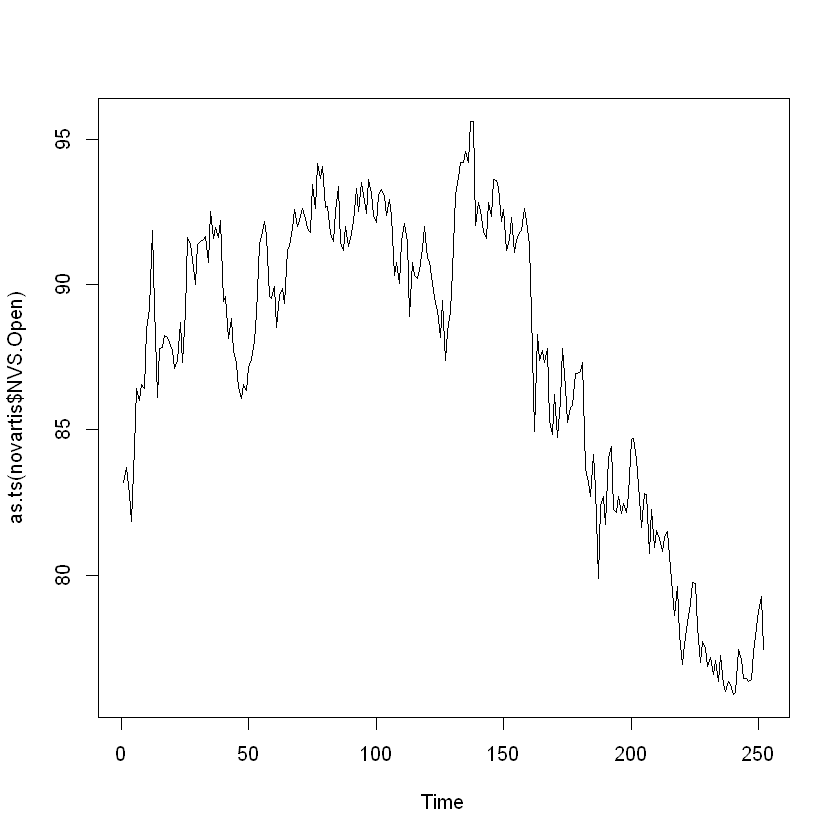

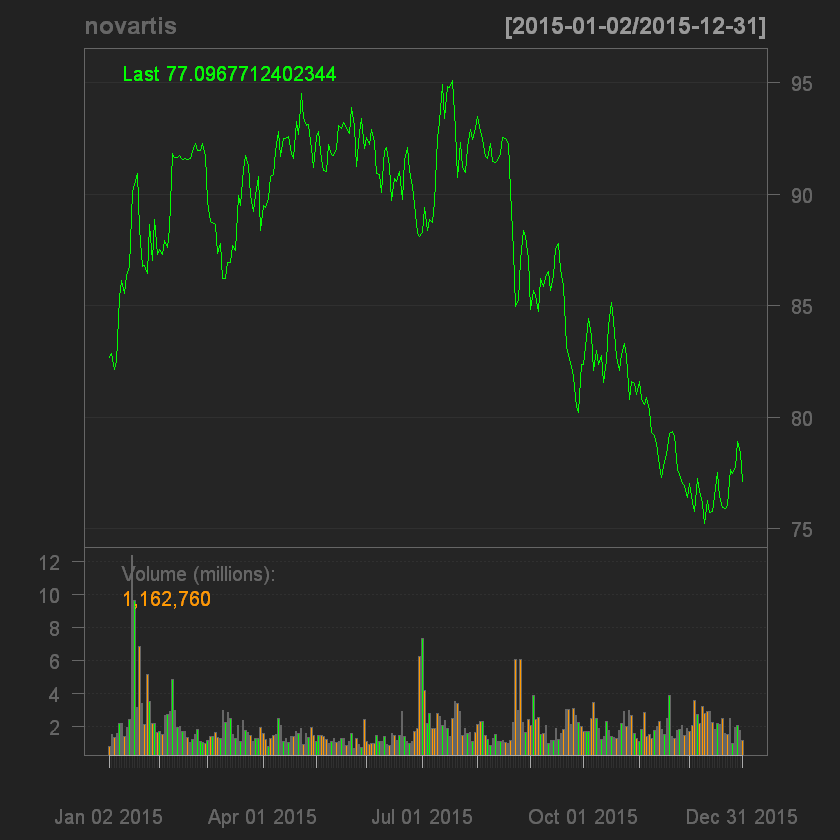

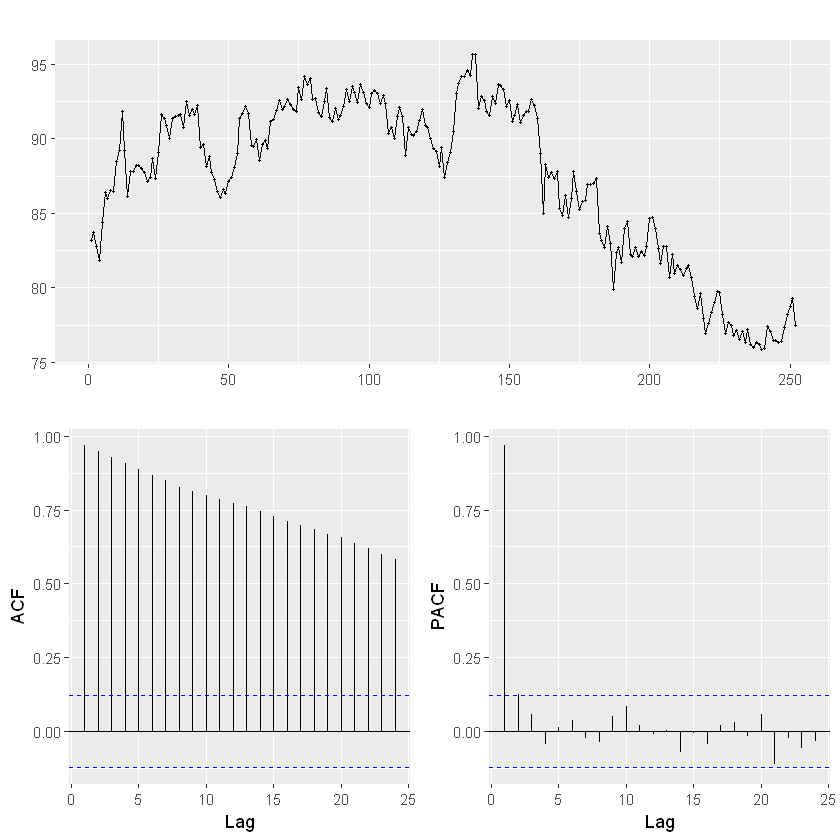

In [6]:
# Explore, and plot using as.ts() function to convert to time series on the Open column
plot(as.ts(novartis$NVS.Open))

# Volume shows the amount of shares traded, green is buy and orange is sell.
chartSeries(novartis, type = "line")

ggtsdisplay(novartis$NVS.Open)


 ARIMA(2,1,2) with drift         : 789.8915
 ARIMA(0,1,0) with drift         : 789.3865
 ARIMA(1,1,0) with drift         : 787.3966
 ARIMA(0,1,1) with drift         : 786.4334
 ARIMA(0,1,0)                    : 787.4522
 ARIMA(1,1,1) with drift         : 786.4954
 ARIMA(0,1,2) with drift         : 786.4976
 ARIMA(1,1,2) with drift         : 788.4009
 ARIMA(0,1,1)                    : 784.5149
 ARIMA(1,1,1)                    : 784.6786
 ARIMA(0,1,2)                    : 784.5871
 ARIMA(1,1,0)                    : 785.468
 ARIMA(1,1,2)                    : 786.4658

 Best model: ARIMA(0,1,1)                    



Series: novartis$NVS.Open 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.1553
s.e.   0.0682

sigma^2 = 1.317:  log likelihood = -390.23
AIC=784.47   AICc=784.51   BIC=791.52

Series: novartis$NVS.Open 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.5904  -0.7247
s.e.  0.3136   0.2723

sigma^2 = 1.312:  log likelihood = -389.29
AIC=784.58   AICc=784.68   BIC=795.16

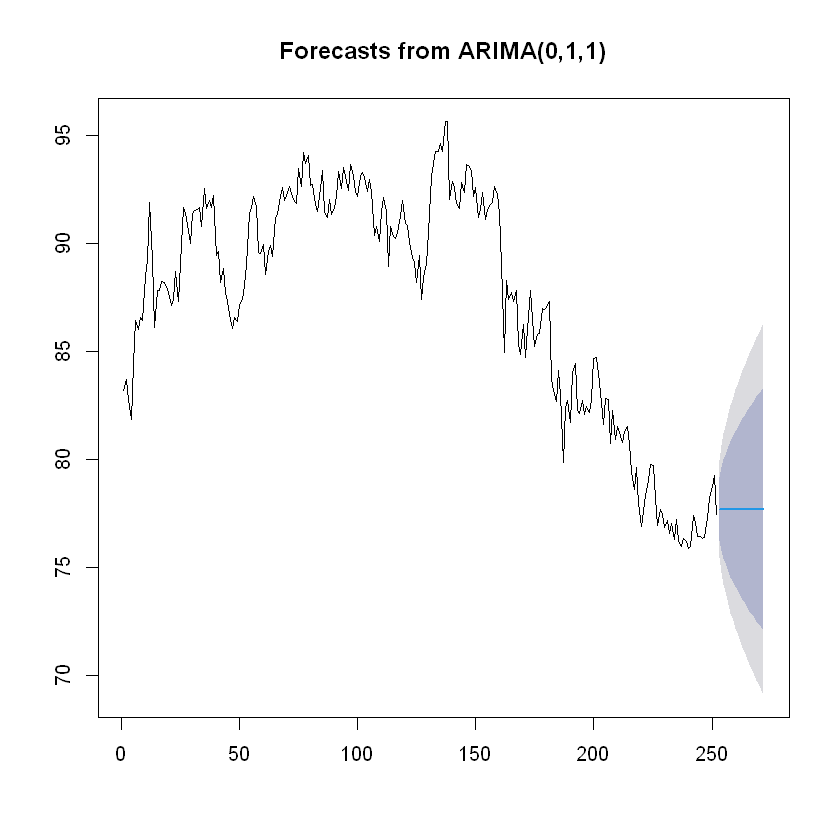

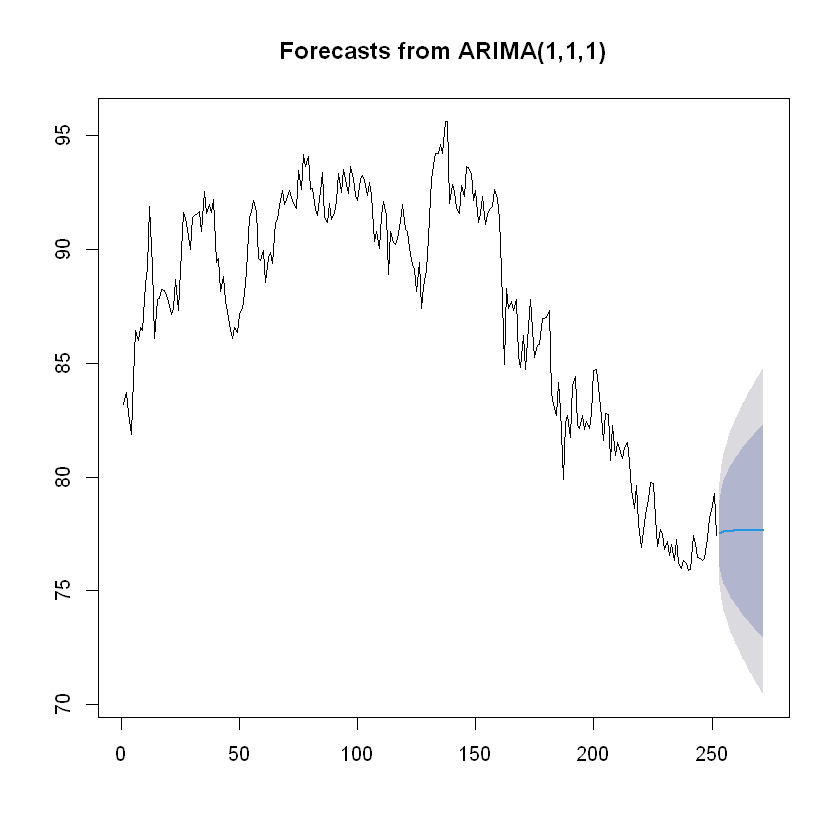

In [9]:
# Create an arima models then plot forecasts
# Autorima
novartisarima <- auto.arima(novartis$NVS.Open,
    stepwise = T,
    approximation = F,
    trace = T
)
novartisarima

# Alternative arima with autoregressive part
novartisarima2 <- Arima(novartis$NVS.Open, order = c(1, 1, 1))
novartisarima2

# Forecast arima
plot(forecast(novartisarima, h = 20))
plot(forecast(novartisarima2, h = 20))

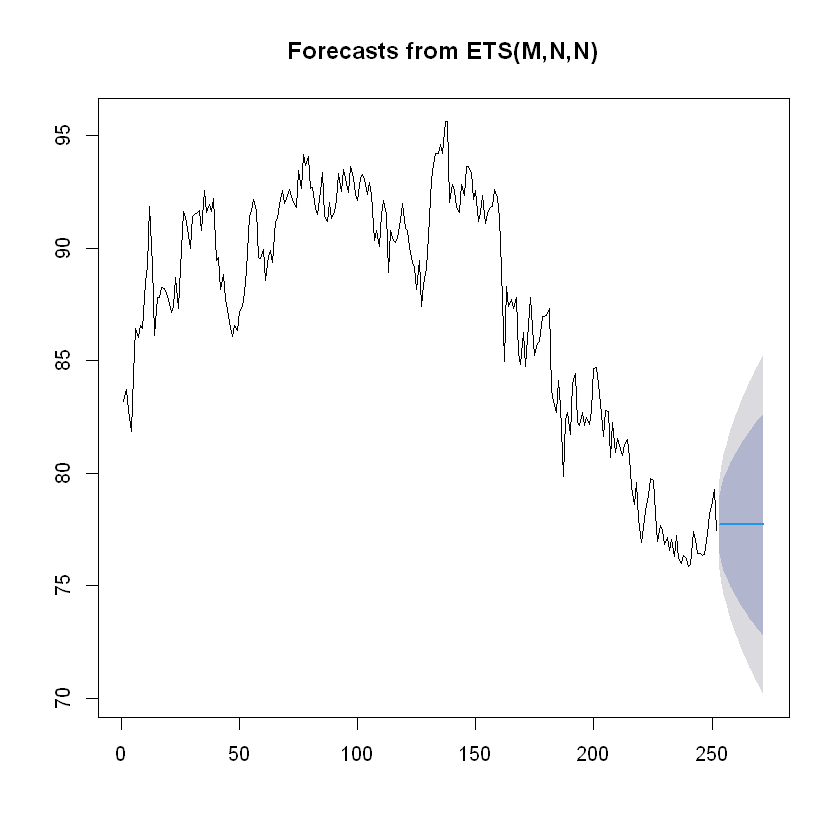

In [10]:
# Ets model
novartisets <- ets(novartis$NVS.Open)

# Forecast ets
plot(forecast(novartisets, h = 20))

In [12]:
# Conversion to dataframe
novartis <- as.data.frame(novartis)

### Adding the rownames as date
novartis$Date <- rownames(novartis)
novartis$Date <- as.Date(novartis$Date)
print(head(novartis))

           NVS.Open NVS.High  NVS.Low NVS.Close NVS.Volume NVS.Adjusted
2015-01-02 83.18101 83.37814 82.44624  82.66129     807872     57.34184
2015-01-05 83.71864 83.73656 82.59856  82.84050    1537848     57.46617
2015-01-06 82.77778 83.09140 81.52330  82.14158    1316992     56.98132
2015-01-07 81.85484 82.70609 81.76524  82.50000    1598447     57.22996
2015-01-08 84.38172 85.72581 84.22939  85.36739    2156782     59.21904
2015-01-09 86.43369 86.74731 85.77957  86.12903    2206890     59.74739
                 Date
2015-01-02 2015-01-02
2015-01-05 2015-01-05
2015-01-06 2015-01-06
2015-01-07 2015-01-07
2015-01-08 2015-01-08
2015-01-09 2015-01-09


In [18]:
# Create an object that contains all dates from 2015-01-01 to 2016-01-01, convert to dataframe, identify missing dates, Merge dataframes and normalize
# set the start and end date
mydates <- seq.Date(
    from = as.Date("2015-01-01"),
    to = as.Date("2016-01-01"),
    by = 1
)
mydates <- data.frame(Date = mydates)
mydata <- merge(novartis, mydates, by = "Date", all.y = T)
# Start on monday
mydata <- mydata[5:366, ]
# Remove Sundays and Mondays
mydata <- mydata[-(seq(from = 7, to = nrow(mydata), by = 7)), ]
mydata <- mydata[-(seq(from = 6, to = nrow(mydata), by = 6)), ]
# Remove NAs
mydata <- na.locf(mydata)
print(mydata)

          Date NVS.Open NVS.High  NVS.Low NVS.Close NVS.Volume NVS.Adjusted
5   2015-01-05 83.71864 83.73656 82.59856  82.84050    1537848     57.46617
6   2015-01-06 82.77778 83.09140 81.52330  82.14158    1316992     56.98132
7   2015-01-07 81.85484 82.70609 81.76524  82.50000    1598447     57.22996
8   2015-01-08 84.38172 85.72581 84.22939  85.36739    2156782     59.21904
9   2015-01-09 86.43369 86.74731 85.77957  86.12903    2206890     59.74739
12  2015-01-12 86.02151 86.11111 85.29570  85.55556    1412186     59.34959
13  2015-01-13 86.56810 87.02509 85.72581  86.34409    1928002     59.89659
14  2015-01-14 86.44265 86.98029 86.21864  86.74731    2447165     60.17629
15  2015-01-15 88.45878 90.34050 87.30286  90.12545   12332693     62.51971
16  2015-01-16 89.19355 90.68996 88.60215  90.45699    9586998     62.74970
19  2015-01-19 89.19355 90.68996 88.60215  90.45699    9586998     62.74970
20  2015-01-20 91.87276 91.92652 90.21506  90.93190    3177698     63.07913
21  2015-01-

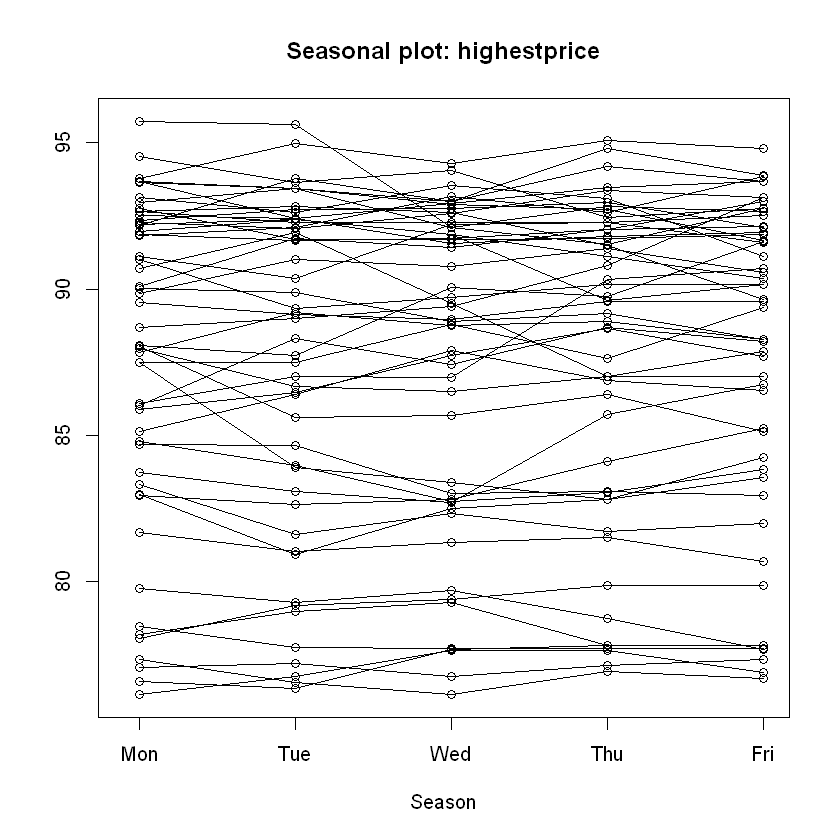

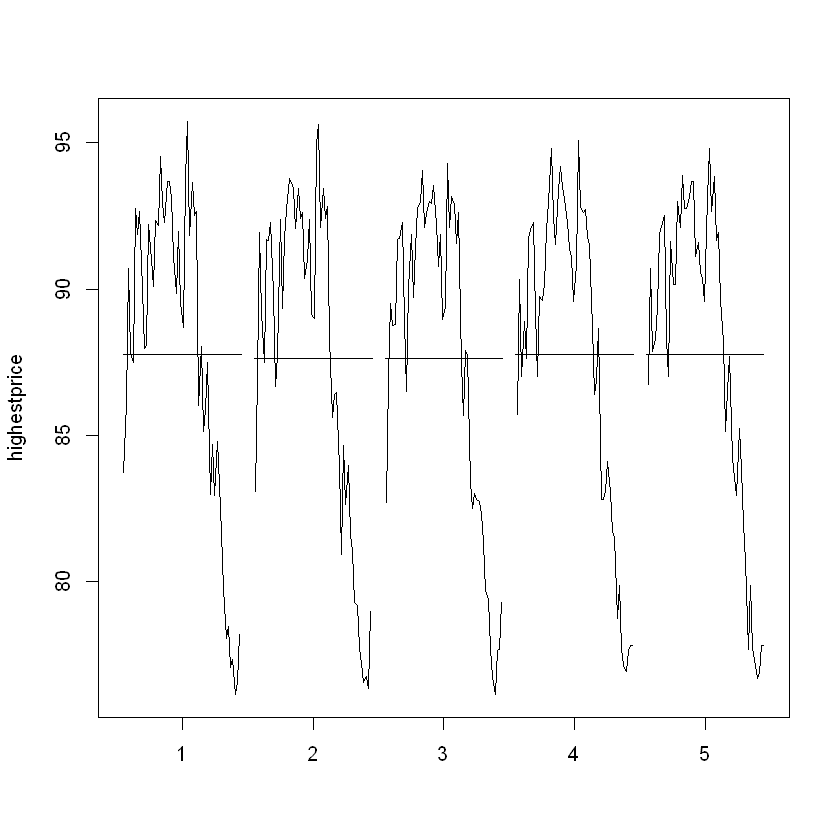

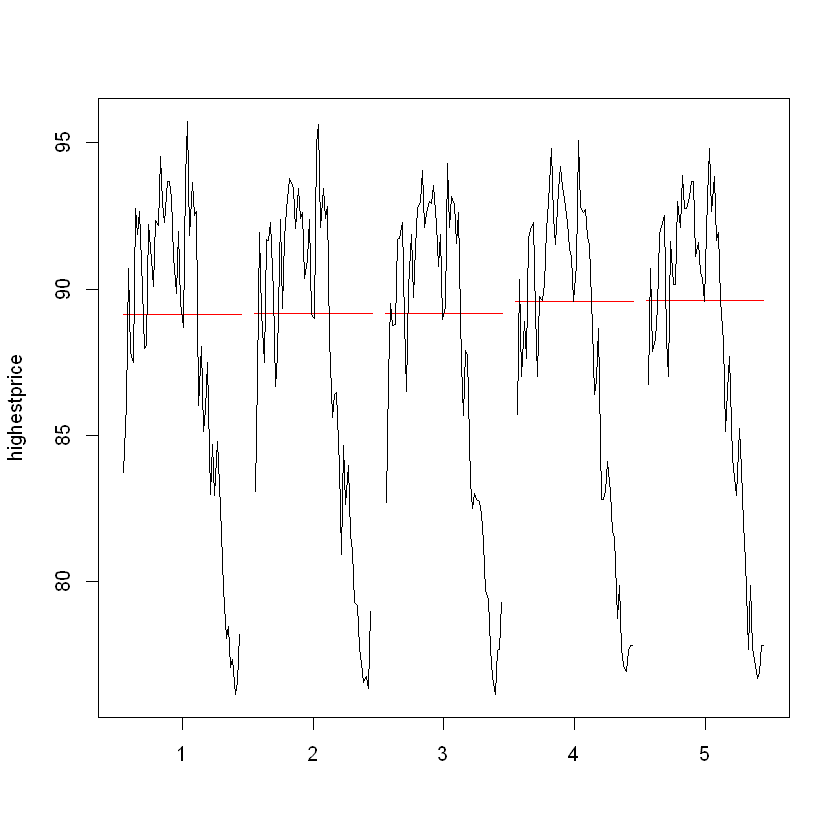

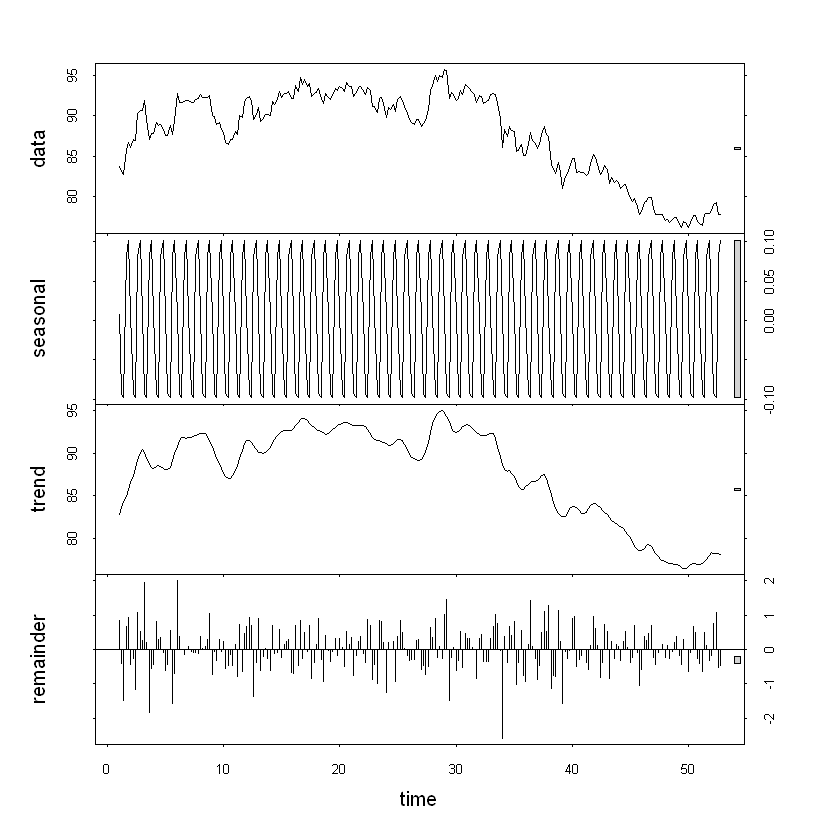

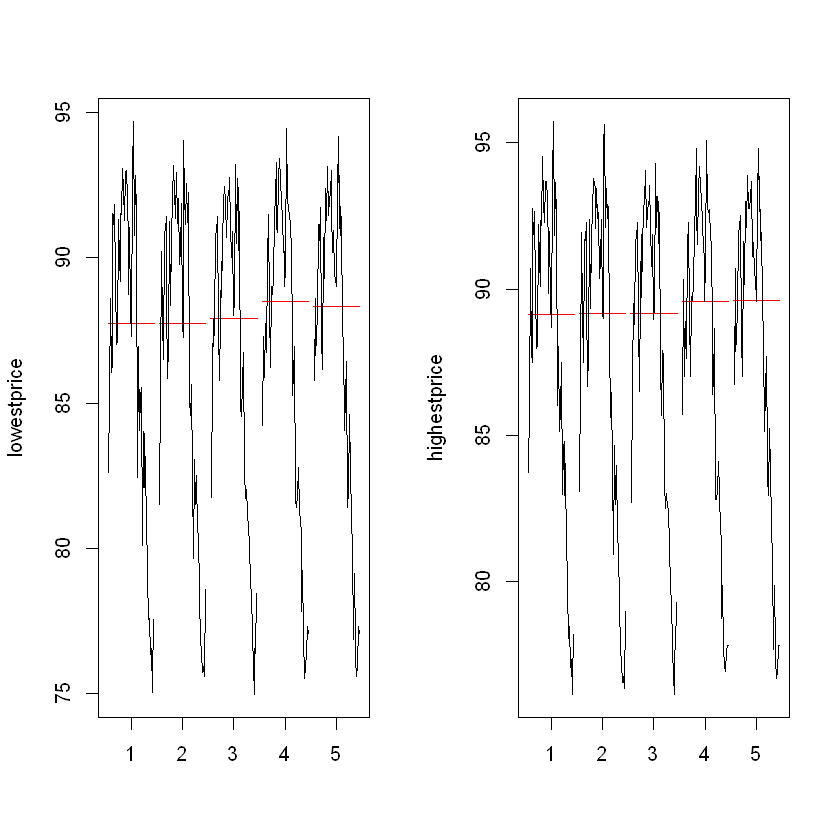

In [19]:
# Determine what days are the best to buy or sell
# Putting the close price into a weekly time series
highestprice <- ts(as.numeric(mydata$NVS.High),
    frequency = 5
)

# Plot the time series with the highest price 
seasonplot(highestprice, season.labels = c("Mon", "Tue", "Wed", "Thu", "Fri"))
monthplot(highestprice)
monthplot(highestprice, base = median, col.base = "red")
plot(stl(highestprice, s.window = "periodic"))

# Comparison with the low prices
par(mfrow = c(1, 2))
lowestprice <- ts(as.numeric(mydata$NVS.Low),
    frequency = 5
)
monthplot(lowestprice, base = median, col.base = "red")
monthplot(highestprice, base = median, col.base = "red")
par(mfrow = c(1, 1))

# In conclusion: For Novartis, Wednesdays has the lowest median price and Fridays have the highest median price. It would make more sense to buy Monday through Wednesday and sell Thursday and Fridays generally.